In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
data = pd.read_csv("/content/blogs.csv", encoding='ascii')

In [35]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [36]:
data["Labels"].nunique()

20

In [37]:
data.shape

(2000, 2)

**LABEL ENCODING**

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Labels"] = le.fit_transform(data["Labels"])

In [39]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0


**LOWERCASE**

In [40]:
data["Data"] = data["Data"].str.lower()

In [41]:
data.head()

,Data,Labels
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,0
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,0
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0


**PUNCTUATION**

In [42]:
import string
data["Data"] = data["Data"].str.replace("[{}]".format(string.punctuation), "")

In [43]:
data.head()

,Data,Labels
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,0
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,0
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0


**LEMMATIZATION**

In [44]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [46]:
data["Data"] = data["Data"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for  word in x.split()]))

In [47]:
data.head()

,Data,Labels
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
1,newsgroups: alt.atheism path: cantaloupe.srv.c...,0
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,0
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,0
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0


In [48]:
x = data["Data"]
y = data["Labels"]

**TF-IDF**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**NAIVE BAYES**

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_pred_test = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_test)

In [54]:
print(f"testing data score: {test_accuracy.round(2)}")


testing data score: 0.73


**SENTIMENT ANALYSIS**

In [55]:
%pip install --upgrade nltk textblob

In [56]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [57]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [58]:
data['sentiment'] = data['Data'].apply(get_sentiment)

In [59]:
sentiment_distribution = data['sentiment'].value_counts()

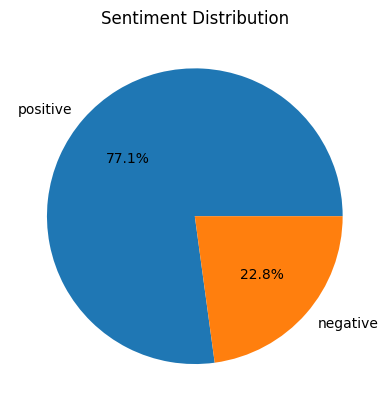

In [60]:
import matplotlib.pyplot as plt
plt.pie(sentiment_distribution.values, labels=sentiment_distribution.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()
